In [ ]:
#load dependecies
from google.colab import drive
drive.mount('/content/drive/')

import tensorflow as tf
from tensorflow.keras import regularizers
import keras as k

import matplotlib.pyplot as plt
import torchsummary as summary
import numpy as np
np.random.seed(53702)
import pandas as pd
import os

!pip install shap --quiet
import shap
%matplotlib inline

!pip install scikit-survival --quiet

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input,LSTM
from keras.backend import dropout 

!pip install lifelines --quiet
import lifelines
from lifelines import CoxPHFitter

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib as mpl

from pylab import rcParams
import seaborn as sns 

In [ ]:
## A detailed table of hazard ratios and confidence intervals
Stages=['REM','N3','N2','N1','Wake']

Modalities=['EEG','EMG','EOG_R','EOG_L','EOG_L2']

OutNames=['Single Effect','Multi Effect']

#For loop iterating over modality, stages, and single effect/multi effect
for OutName in OutNames:

  for Modality in Modalities:

    for Stage in Stages:


      os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/P_data_loglik')

      Comb_M1 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_1' + '_' +  Stage + '_'+ OutName +'.csv')
      Comb_M2 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_2' + '_' +  Stage + '_'+ OutName +'.csv')
      Comb_M3 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_3' + '_' +  Stage + '_'+ OutName +'.csv')
      Comb_M4 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_4' + '_' +  Stage + '_'+ OutName +'.csv')
      os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/')
      Rv=Comb_M1["P_val"]
      N3v=Comb_M2["P_val"]
      N2v=Comb_M3["P_val"]
      N1v=Comb_M4["P_val"]

      P_val_Nd = np.vstack((Rv, N3v,N2v,N1v)).T
      p_org=P_val_Nd

      Rv=Comb_M1["HR"]
      N3v=Comb_M2["HR"]
      N2v=Comb_M3["HR"]
      N1v=Comb_M4["HR"]

      HR_Nd = np.vstack((Rv, N3v,N2v,N1v)).T

      NewNames=Comb_M1['LL']

      CombHRandCI=[]
      for i in range(len(NewNames)):
        HRstr=str(round(Comb_M1["HR"][i],2))
        CILstr=str(round(Comb_M1['LowerCI'][i],2))
        CIHstr=str(round(Comb_M1['UpperCI'][i],2))
        if Comb_M1['LogLik'][i]==1:
          sigstring='*'
        else:
          sigstring=''
        CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')' + sigstring)
      
      M1_list=CombHRandCI

      CombHRandCI=[]
      for i in range(len(NewNames)):
        HRstr=str(round(Comb_M2["HR"][i],2))
        CILstr=str(round(Comb_M2['LowerCI'][i],2))
        CIHstr=str(round(Comb_M2['UpperCI'][i],2))
        if Comb_M2['LogLik'][i]==1:
          sigstring='*'
        else:
          sigstring=''
        CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')' + sigstring)
      
      M2_list=CombHRandCI

      CombHRandCI=[]
      for i in range(len(NewNames)):
        HRstr=str(round(Comb_M3["HR"][i],2))
        CILstr=str(round(Comb_M3['LowerCI'][i],2))
        CIHstr=str(round(Comb_M3['UpperCI'][i],2))
        if Comb_M3['LogLik'][i]==1:
          sigstring='*'
        else:
          sigstring=''
        CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')' + sigstring)
      
      M3_list=CombHRandCI

      CombHRandCI=[]
      for i in range(len(NewNames)):
        HRstr=str(round(Comb_M4["HR"][i],2))
        CILstr=str(round(Comb_M4['LowerCI'][i],2))
        CIHstr=str(round(Comb_M4['UpperCI'][i],2))
        if Comb_M4['LogLik'][i]==1:
          sigstring='*'
        else:
          sigstring=''
        CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')' + sigstring)
      
      M4_list=CombHRandCI

      Str_Intervals=pd.DataFrame([M1_list,M2_list,M3_list,M4_list]).T
      Str_Intervals.columns=['M1','M2','M3','M4']

      Str_Intervals.index = NewNames.values

      df = Str_Intervals

      P_val_Nd=p_org
      Colors=P_val_Nd
      HR_2=HR_Nd
      for i in range(len(P_val_Nd)):
        for j in range(4):
          if P_val_Nd[i][j]>=0.05:
            HR_2[i][j]=1;
      Colors=pd.DataFrame(Colors)

      for i in range(len(NewNames)):
        NewNames[i]=str(Comb_M1['LL'][i]) + '-'+ str(Comb_M1["UL"][i])

      rcParams['figure.figsize'] = 12, 0.5*(np.shape(df)[0])
      plt.figure()
      ax=sns.heatmap(HR_2, annot=df, cmap="seismic", cbar=True, lw=0.01,fmt = '', vmin=0.8, vmax=1.2)

      ax.set_xticklabels(['Model 1','Model 2','Model 3','Model 4'],weight='bold')
      ax.set_yticklabels(NewNames,weight='bold')
      ax.vlines([0, 1, 2, 3, 4, 5], *ax.get_ylim())
      ax.set_title(Modality + ' - ' +  Stage + ' - '+ OutName,weight='bold')
      ax.tick_params(axis='y', rotation=0)

      outname=Modality + ' - ' +  Stage + ' - '+ OutName

      #File Directory and saving
      script_dir = os.getcwd()
      out_extend= 'P_data_loglik/Detailed_'+Modality + '_' +'/' 
      results_dir = os.path.join(script_dir, out_extend )
      sample_file_name = outname

      if not os.path.isdir(results_dir):
          os.makedirs(results_dir)
      plt.yticks(rotation = 15)
      ax.set_ylabel('Frequency [Hz]')
      #fig.show()

      plt.savefig( results_dir + sample_file_name +'InfoPlot' + '.pdf', bbox_inches="tight",dpi=500)


In [ ]:
## A 'dot plot' of hazard ratios and confidence intervals

Stages=['REM','N3','N2','N1','Wake']

Modalities=['EEG','EMG','EOG_R','EOG_L','EOG_L2']

OutNames=['Single Effect','Multi Effect']

for OutName in OutNames:

  for Modality in Modalities:

    for Stage in Stages:

      modeltype='Model_1'

      os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/P_data')


      Comb_M1 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_1' + '_' +  Stage + '_'+ OutName +'.csv')
      Comb_M2 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_2' + '_' +  Stage + '_'+ OutName +'.csv')
      Comb_M3 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_3' + '_' +  Stage + '_'+ OutName +'.csv')
      Comb_M4 = pd.read_csv(' P_data_' + Modality + '_' + 'Model_4' + '_' +  Stage + '_'+ OutName +'.csv')
      os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/')
      Rv=Comb_M1["P_val"]
      N3v=Comb_M2["P_val"]
      N2v=Comb_M3["P_val"]
      N1v=Comb_M4["P_val"]


      P_val_Nd = np.vstack((Rv, N3v,N2v,N1v)).T
      p_org=P_val_Nd

      Rv=Comb_M1["HR"]
      N3v=Comb_M2["HR"]
      N2v=Comb_M3["HR"]
      N1v=Comb_M4["HR"]

      HR_Nd = np.vstack((Rv, N3v,N2v,N1v)).T

      NewNames=Comb_M1['LL']

      for i in range(len(NewNames)):
        NewNames[i]=str(Comb_M1['LL'][i]) + '-'+ str(Comb_M1["UL"][i])

      P_val_Nd=p_org
      for i in range(len(P_val_Nd)):
        for j in range(4):
          if P_val_Nd[i][j]>=0.05:
            P_val_Nd[i][j]=0.051;


      N = 4 
      
      M = len(NewNames)

      rcParams['figure.figsize'] = 0.5*M, 2

      ylabels = np.flipud(['  M1  ',' M2  ','  M3  ','  M4  '])#
      xlabels = (NewNames)

      P_val_Nd=p_org

      x, y = np.meshgrid(np.arange(M), np.arange(N))
      s = np.flipud(abs(P_val_Nd.T-0.051))
      c = np.flipud(HR_Nd.T)

      fig, ax = plt.subplots()

      R = s/s.max()/2

      circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
      col = PatchCollection(circles, array=c.flatten(), cmap='seismic')
      ax.add_collection(col)

      ax.set(xticks=np.arange(M), yticks=np.arange(N),
            xticklabels=xlabels, yticklabels=ylabels)
      ax.set_xticks(np.arange(M+1)-0.5, minor=True)
      ax.set_yticks(np.arange(N+1)-0.5, minor=True)
      ax.grid(which='minor')


      colorBar=fig.colorbar(col)
      col.set_clim(vmin=0.8, vmax=1.2)
      colorBar.ax.set_xlabel('HR')

      ax.set_title(Modality + ' - ' +  Stage + ' - '+ OutName,weight='bold')


      outname=Modality + ' - ' +  Stage + '-'+ OutName 

      #File Directory and saving
      script_dir = os.getcwd()
      out_extend=Modality + '_' +'/' 
      results_dir = os.path.join(script_dir, out_extend )
      sample_file_name = outname

      if not os.path.isdir(results_dir):
          os.makedirs(results_dir)
      plt.xticks(rotation = 45)
      ax.set_xlabel('Frequency [Hz]')
      fig.show()

      fig.savefig( results_dir + sample_file_name + '.pdf', bbox_inches="tight",dpi=1500)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


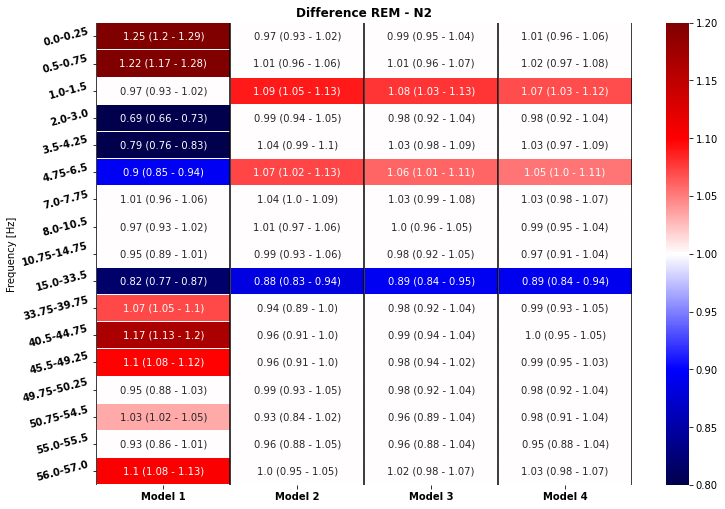

In [ ]:
######################################      FOR DIFF REM N2    ######################################
##################################################################################################################
##################################################################################################################
##################################################################################################################
#Detailed table of hazard ratios and confidence intervals REM and N2
Stages=['DIFF']

Modalities=['DIFF']

OutNames=['Single Effect']


Modality='DIFF'
Stage='Diff'


os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/')


Comb_M1 = pd.read_csv( Modality + '_' + '1' + '_' +  Stage + '_'+ OutName +'.csv')
Comb_M2 = pd.read_csv( Modality + '_' + '2' + '_' +  Stage + '_'+ OutName +'.csv')
Comb_M3 = pd.read_csv( Modality + '_' + '3' + '_' +  Stage + '_'+ OutName +'.csv')
Comb_M4 = pd.read_csv( Modality + '_' + '4' + '_' +  Stage + '_'+ OutName +'.csv')
os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/')
Rv=Comb_M1["P_val"]
N3v=Comb_M2["P_val"]
N2v=Comb_M3["P_val"]
N1v=Comb_M4["P_val"]


P_val_Nd = np.vstack((Rv, N3v,N2v,N1v)).T
p_org=P_val_Nd

Rv=Comb_M1["HR"]
N3v=Comb_M2["HR"]
N2v=Comb_M3["HR"]
N1v=Comb_M4["HR"]

HR_Nd = np.vstack((Rv, N3v,N2v,N1v)).T

NewNames=Comb_M1['LL']

CombHRandCI=[]
for i in range(len(NewNames)):
  HRstr=str(round(Comb_M1["HR"][i],2))
  CILstr=str(round(Comb_M1['LowerCI'][i],2))
  CIHstr=str(round(Comb_M1['UpperCI'][i],2))
  CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')')

M1_list=CombHRandCI

CombHRandCI=[]
for i in range(len(NewNames)):
  HRstr=str(round(Comb_M2["HR"][i],2))
  CILstr=str(round(Comb_M2['LowerCI'][i],2))
  CIHstr=str(round(Comb_M2['UpperCI'][i],2))
  CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')')

M2_list=CombHRandCI

CombHRandCI=[]
for i in range(len(NewNames)):
  HRstr=str(round(Comb_M3["HR"][i],2))
  CILstr=str(round(Comb_M3['LowerCI'][i],2))
  CIHstr=str(round(Comb_M3['UpperCI'][i],2))
  CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')')

M3_list=CombHRandCI

CombHRandCI=[]
for i in range(len(NewNames)):
  HRstr=str(round(Comb_M4["HR"][i],2))
  CILstr=str(round(Comb_M4['LowerCI'][i],2))
  CIHstr=str(round(Comb_M4['UpperCI'][i],2))
  CombHRandCI.append(HRstr + ' (' + CILstr + ' - ' + CIHstr +')')

M4_list=CombHRandCI

Str_Intervals=pd.DataFrame([M1_list,M2_list,M3_list,M4_list]).T
Str_Intervals.columns=['M1','M2','M3','M4']

Str_Intervals.index = NewNames.values

df = Str_Intervals

P_val_Nd=p_org
Colors=P_val_Nd
HR_2=HR_Nd
for i in range(len(P_val_Nd)):
  for j in range(4):
    if P_val_Nd[i][j]>=0.05:
      HR_2[i][j]=1;
Colors=pd.DataFrame(Colors)

for i in range(len(NewNames)):
  NewNames[i]=str(Comb_M1['LL'][i]) + '-'+ str(Comb_M1["UL"][i])

rcParams['figure.figsize'] = 12, 0.5*(np.shape(df)[0])
plt.figure()
ax=sns.heatmap(HR_2, annot=df, cmap="seismic", cbar=True, lw=0.01,fmt = '', vmin=0.8, vmax=1.2)

ax.set_xticklabels(['Model 1','Model 2','Model 3','Model 4'],weight='bold')
ax.set_yticklabels(NewNames,weight='bold')
ax.vlines([0, 1, 2, 3, 4, 5], *ax.get_ylim())
ax.set_title('Difference REM - N2',weight='bold')
ax.tick_params(axis='y', rotation=0)

outname=Modality + ' - ' +  Stage + ' - '+ OutName

#File Directory and saving
script_dir = os.getcwd()
out_extend= 'Detailed_'+Modality + '_' +'/' 
results_dir = os.path.join(script_dir, out_extend )
sample_file_name = outname

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
plt.yticks(rotation = 15)
ax.set_ylabel('Frequency [Hz]')
#fig.show()

plt.savefig( results_dir + sample_file_name +'InfoPlot' + '.pdf', bbox_inches="tight",dpi=500)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


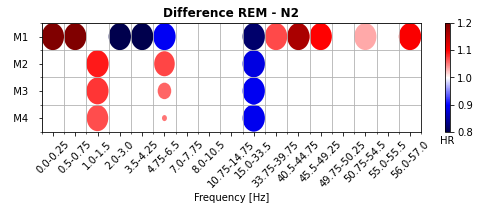

In [ ]:
#'Dot plot' of hazard ratios and confidence intervals for difference between REM and N2
Stages=['DIFF']

Modalities=['DIFF']

OutNames=['Single Effect']


Modality='DIFF'
Stage='Diff'


os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/')


Comb_M1 = pd.read_csv( Modality + '_' + '1' + '_' +  Stage + '_'+ OutName +'.csv')
Comb_M2 = pd.read_csv( Modality + '_' + '2' + '_' +  Stage + '_'+ OutName +'.csv')
Comb_M3 = pd.read_csv( Modality + '_' + '3' + '_' +  Stage + '_'+ OutName +'.csv')
Comb_M4 = pd.read_csv( Modality + '_' + '4' + '_' +  Stage + '_'+ OutName +'.csv')
os.chdir('/content/drive/MyDrive/Speciale/DL after 14-06/Visualize_bands/')
Rv=Comb_M1["P_val"]
N3v=Comb_M2["P_val"]
N2v=Comb_M3["P_val"]
N1v=Comb_M4["P_val"]


P_val_Nd = np.vstack((Rv, N3v,N2v,N1v)).T
p_org=P_val_Nd

Rv=Comb_M1["HR"]
N3v=Comb_M2["HR"]
N2v=Comb_M3["HR"]
N1v=Comb_M4["HR"]

HR_Nd = np.vstack((Rv, N3v,N2v,N1v)).T

NewNames=Comb_M1['LL']

for i in range(len(NewNames)):
  NewNames[i]=str(Comb_M1['LL'][i]) + '-'+ str(Comb_M1["UL"][i])

P_val_Nd=p_org
for i in range(len(P_val_Nd)):
  for j in range(4):
    if P_val_Nd[i][j]>=0.05:
      P_val_Nd[i][j]=0.051;


N = 4 


M = len(NewNames)

rcParams['figure.figsize'] = 0.5*M, 2

ylabels = np.flipud(['  M1  ',' M2  ','  M3  ','  M4  '])#["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = (NewNames)#["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

P_val_Nd=p_org

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.flipud(abs(P_val_Nd.T-0.051))#np.random.randint(0, 180, size=(N,M))
c = np.flipud(HR_Nd.T)#np.random.rand(N, M)-0.5+100
#c=Combined_Output["P-val"][0:]

fig, ax = plt.subplots()

R = s/s.max()/2

circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap='seismic')
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
      xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')


colorBar=fig.colorbar(col)
col.set_clim(vmin=0.8, vmax=1.2)
colorBar.ax.set_xlabel('HR')

ax.set_title('Difference REM - N2',weight='bold')
#plt.savefig('myfile.png', bbox_inches="tight")

outname=Modality + ' - ' +  Stage + '-'+ OutName 

#File Directory and saving
script_dir = os.getcwd()
out_extend=Modality + '_' +'/' 
results_dir = os.path.join(script_dir, out_extend )
sample_file_name = outname

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)
plt.xticks(rotation = 45)
ax.set_xlabel('Frequency [Hz]')
fig.show()

fig.savefig( results_dir + sample_file_name + '.pdf', bbox_inches="tight",dpi=1500)
